Building prefix dict from /Users/hongyining/testbot/dictionary/dict.txt.big.txt ...
Loading model from cache /var/folders/9m/c2y7c9n93g72xbczzc8l40280000gn/T/jieba.u6b76574a6c9854ca9dfe84300984f1b9.cache
Loading model cost 0.002 seconds.
Prefix dict has been built succesfully.


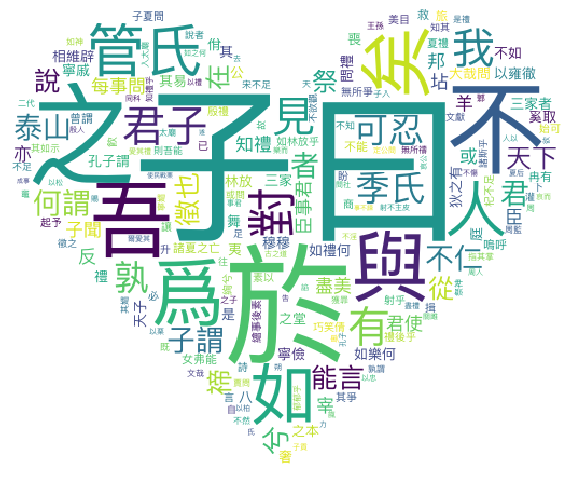

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

text = open('three.txt', "r",encoding="utf-8").read()  #讀文字資料
 
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopword.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "/Users/hongyining/Library/Fonts/Kaiu.ttf"  #設定字型(宋體)
font = "/System/Library/Fonts/PingFang.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("heart.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white", mask=mask , font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/hongyining/testbot/static/three.png")  #存檔
